# Simulando uma carteira de ações e comparando com o IBOVESPA

## Importando as Bilbiotecas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yf

In [2]:
yf.pdr_override()

## Obtendo e tratando os dados

Montando a carteira

In [3]:
tickers = 'ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA'

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


Limpando os dados faltantes

In [4]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2016-01-11,14.875612,3.926150,1.163942,8.759892,9.907955
2016-01-12,15.034992,3.878487,1.115445,8.049861,10.348451
2016-01-13,14.902176,3.890405,0.999051,7.699123,9.963859
2016-01-14,14.919887,3.908277,1.008750,8.255171,9.970858
2016-01-15,14.689666,3.842741,0.931154,8.015641,9.872961
...,...,...,...,...,...
2021-01-04,15.480000,11.550000,14.940000,91.459999,74.620003
2021-01-05,15.810000,11.460000,15.100000,93.000000,79.199997
2021-01-06,16.129999,11.690000,15.830000,96.050003,81.300003


In [5]:
ibov.dropna(inplace=True)
ibov

Date
2016-01-11     39950.0
2016-01-12     39514.0
2016-01-13     38944.0
2016-01-14     39500.0
2016-01-15     38569.0
                ...   
2021-01-04    118558.0
2021-01-05    119223.0
2021-01-06    119851.0
2021-01-07    121956.0
2021-01-08    125199.0
Name: Adj Close, Length: 1234, dtype: float64

## Resultados

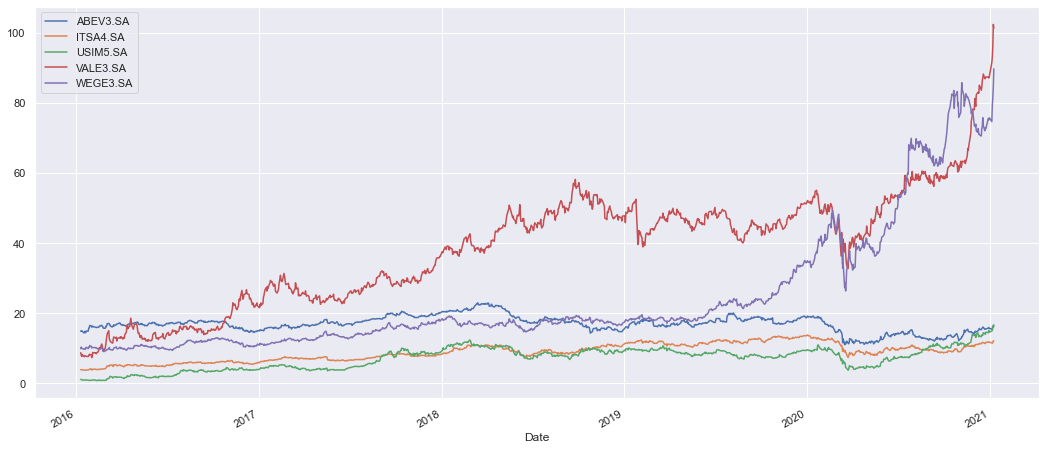

In [6]:
sns.set()
carteira.plot(figsize=(18,8));

## Normalizando a carteira

É necessario normaliza a carteira pra falicitar a visualização do desempenho dela ao longo do tempo. Para normalizar, basta,dividir os indice de todos os ativos pelo indice tomado como base. Aqui o indice base é o primeiro da carteira, ou seja, o mais antigo.

In [7]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

Visualizando a carteira Normalizada

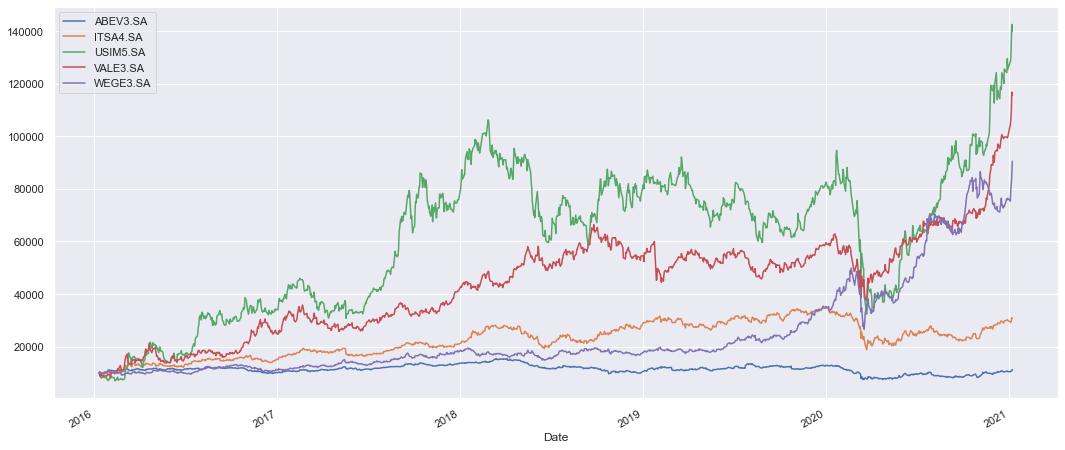

In [8]:
carteira_normalizada.plot(figsize=(18,8));

O saldo da minha carteira é a soma de todos os ativos. Desta forma, vamos adicionar um novo campo com o valor do saldo.

In [9]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [10]:
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2016-01-11,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2016-01-12,10107.141781,9878.602444,9583.333675,9189.452798,10444.587691,49203.118388
2016-01-13,10017.857177,9908.957450,8583.334289,8789.062483,10056.422777,47355.634177
2016-01-14,10029.763031,9954.478118,8666.667145,9423.827695,10063.486814,48138.222802
2016-01-15,9874.999118,9787.556251,8000.000717,9150.388682,9964.680779,46777.625547
...,...,...,...,...,...,...
2021-01-04,10406.294056,29418.135700,128356.870482,104407.684707,75313.222021,347902.206965
2021-01-05,10628.134254,29188.903089,129731.515909,106165.698392,79935.764335,355650.015979
2021-01-06,10843.250604,29774.717602,136003.300335,109647.480157,82055.279479,368324.028177


## Normalizando o indice Bovespa

In [11]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2016-01-11     50000.000000
2016-01-12     49454.317897
2016-01-13     48740.926158
2016-01-14     49436.795995
2016-01-15     48271.589487
                  ...      
2021-01-04    148382.978723
2021-01-05    149215.269086
2021-01-06    150001.251564
2021-01-07    152635.794743
2021-01-08    156694.618273
Name: Adj Close, Length: 1234, dtype: float64

## Visualizando o resultado Final

In [12]:
carteira_normalizada.describe()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,11407.380876,22653.712025,61003.639441,43730.929462,24331.875384,163127.537188
std,1542.496403,6371.954511,26774.673020,18661.189197,18271.504868,62219.396008
min,7414.820675,9529.582118,7083.334187,8398.438197,9134.929356,46442.181949
25%,10620.583387,17310.403271,36787.973932,29078.537250,12893.340459,107430.818069
50%,11502.935273,22715.146503,68240.551684,48175.141191,17550.020001,177032.100154
75%,12262.295481,27764.463444,80951.345452,55703.507910,24187.374462,196838.801738
max,15444.254180,35181.463571,142532.835388,116805.099216,90503.031789,388093.520201


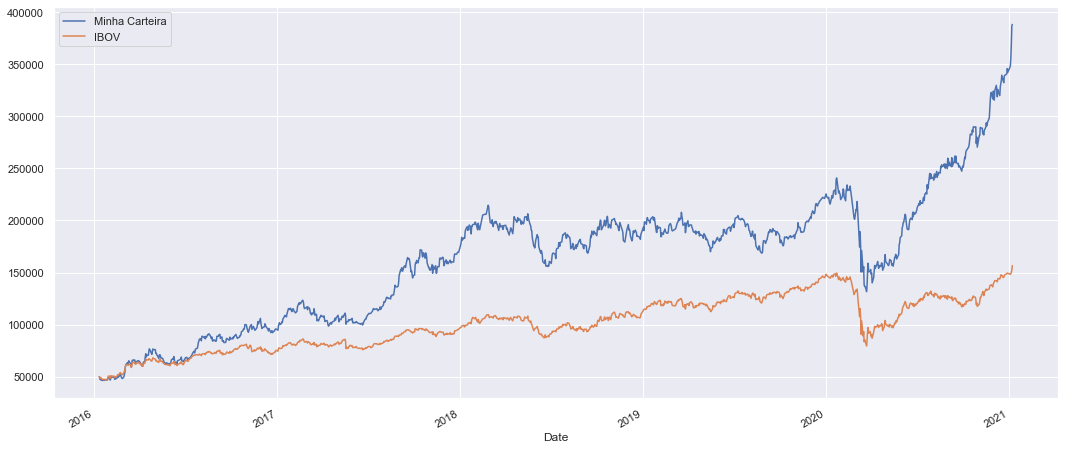

In [13]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();